# EDA of Different Categories

Based on feedback from the customer, this notebook explores ten of the most frequently ordered items...




![alt text](https://drive.google.com/uc?id=1cGVKwDHUPFI5U8ys1U3QSmOrpXZvEKjK)



# Setup-Imports

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Mon Oct 14 13:28:56 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#Import the cleaned up data frame from the "clean up report"

#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_clean.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year.csv', low_memory=False)
# df = pd.read_csv('drive/My Drive/Capstone_2/data/two_year.csv', low_memory=False)
#df = pd.read_csv('drive/My Drive/Capstone_2/data/df_2018.csv', low_memory=False)

df = pd.read_csv('drive/My Drive/Capstone_2/data/ten_items.csv', index_col= 'invdate', parse_dates= True,)#individual items to test models
df2 = pd.read_csv('drive/My Drive/Capstone_2/data/correct_cat_pivot.csv', index_col= 'invdate', parse_dates= True, low_memory=False)#categories to test models


In [0]:
#filling in the missing days for both dfs
idx = pd.date_range('2018-08-24', '2019-08-23')
df = df.reindex(idx, fill_value=0)

In [0]:
#seeing how many unique label groups there are once the first word was separated out in the description column
df.head()

,broccoli,"cabbage,green",cauliflower,crimini_mush,cucumber,garlic_peeled_5lb,jalapeno,"kale,green","kale,lacinato",leeks_20lb,red_bagged_beets_25lb,roma_tomato,strawberry
2018-08-24,10.0,5.0,11.0,25.0,9.0,7.0,6.0,5.0,1.0,1.0,3.0,4.0,25.0
2018-08-25,1.0,0.0,2.0,3.0,2.0,2.0,5.0,2.0,1.0,1.0,2.0,1.0,31.0
2018-08-26,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-27,6.0,2.0,12.0,22.0,15.0,7.0,12.0,6.0,1.0,2.0,5.0,5.0,15.0
2018-08-28,4.0,7.0,7.0,12.0,10.0,6.0,7.0,1.0,2.0,1.0,3.0,1.0,20.0


# Overview of the Different Categories

Text(0.5, 1.0, 'Count Plot of the Items')

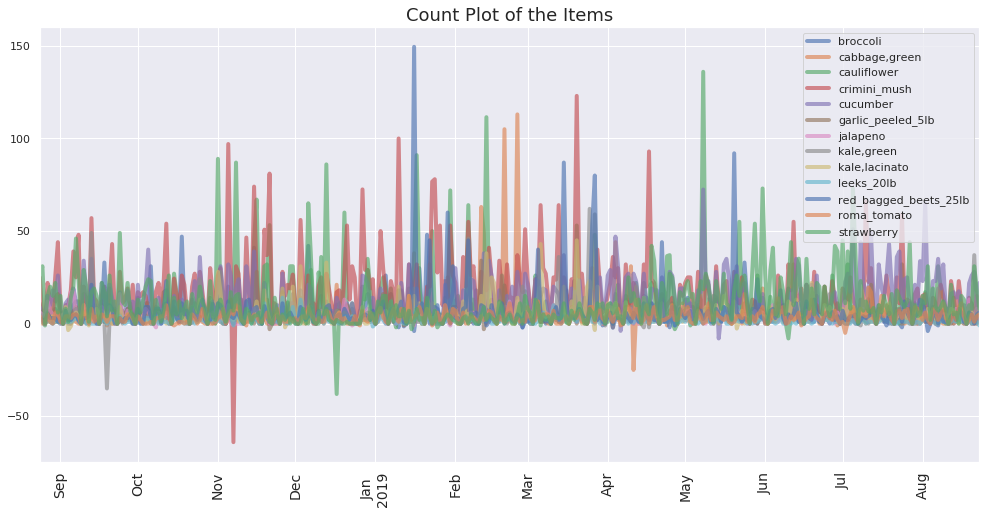

In [0]:
#Large view of different cateogories

df.plot(figsize=(15,8), linewidth= 4, alpha= .65)
plt.xticks(rotation =90, fontsize= 14)
plt.legend()
plt.title('Count Plot of the Items', fontsize= 18)

### Based on this plot I went back and combined meat & GObox into specialty and bread into dry_goods because 
#these separate categories were too insignificant compared to the other data points


 Yearly Timeseries of Different Food Items:



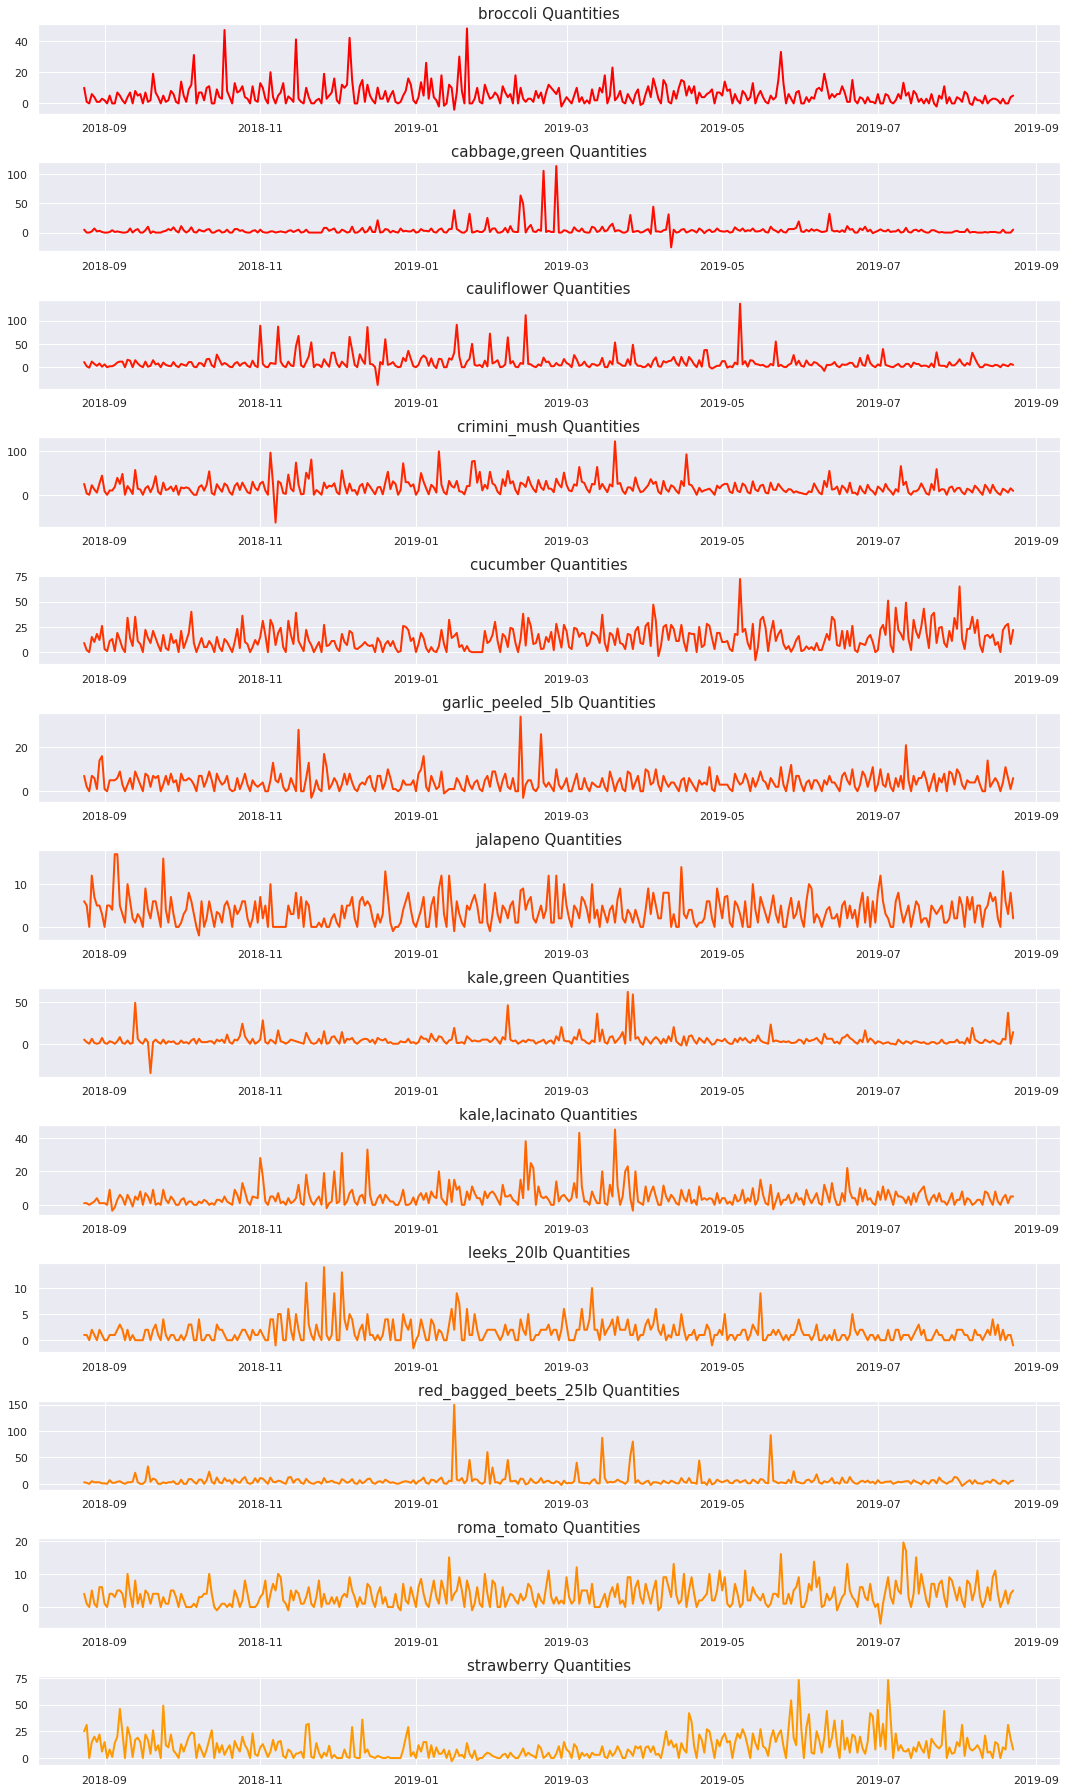

In [0]:
#visualizing categories
import matplotlib as mpl
print('\n Yearly Timeseries of Different Food Items:\n')

fig, axs = plt.subplots(13, figsize=(15,25))
cmap = mpl.cm.autumn
nsteps = 20
for num, col in enumerate (df.columns):
  axs[num].plot(df.index, df[col], linewidth= 2, label= col , color=cmap(num / float(nsteps)))
  axs[num].set_title (f"{col} Quantities", fontsize= 15)
  
plt.tight_layout()


 Yearly Timeseries of Different Food Items:



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


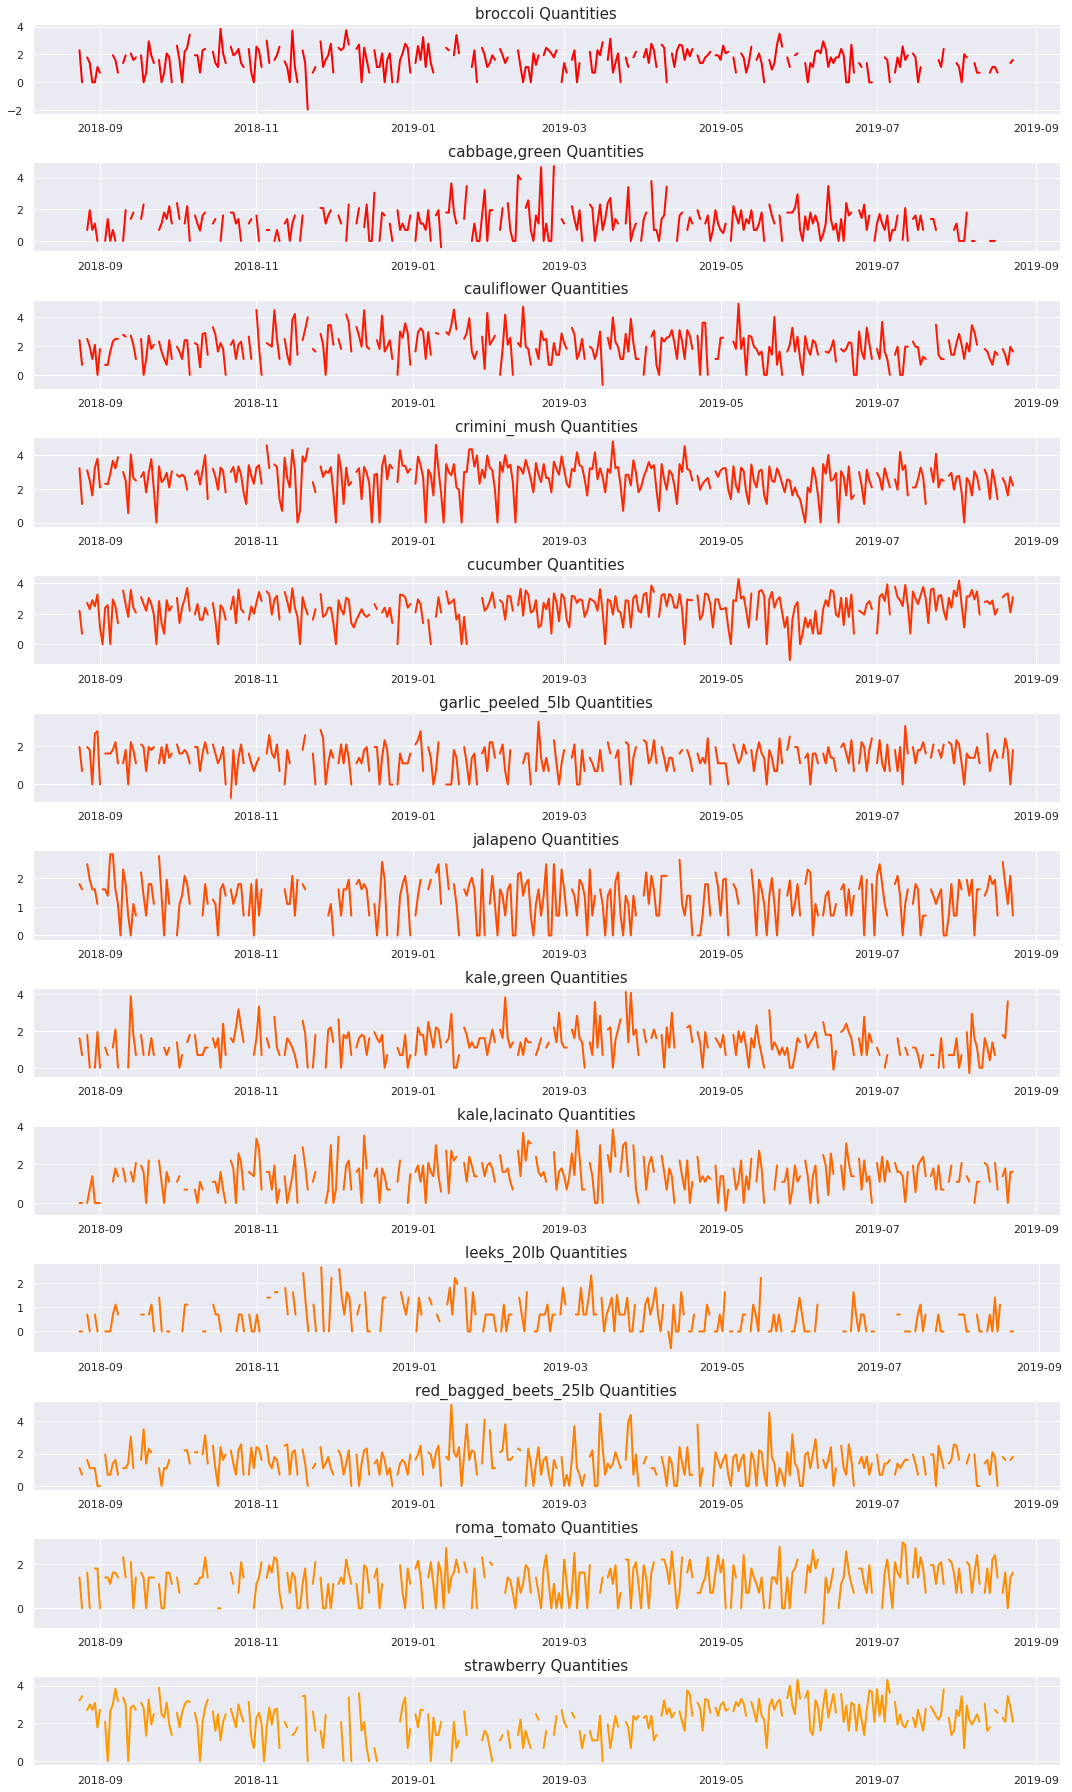

In [0]:
#visualizing categories
import matplotlib as mpl
print('\n Yearly Timeseries of Different Food Items:\n')

fig, axs = plt.subplots(13, figsize=(15,25))
cmap = mpl.cm.autumn
nsteps = 20
for num, col in enumerate (df.columns):
  axs[num].plot(df.index, np.log(df[col]), linewidth= 2, label= col , color=cmap(num / float(nsteps)))
  axs[num].set_title (f"{col} Quantities", fontsize= 15)
  
plt.tight_layout()

#### Insights:


*   Interesting! The Strawberries are following the seasonality of the fruits category, but really everything has it's own unique pattern. 
* I'm really thinking I need to get away from the categories all the together, and just start modelling individual items. 
* Would it help them to know about strawberries in general verus all the different quantities of strawberries? hmmm...




# Taking a closer look at Weekly, Monthly, and day of the week seasonalities

In [0]:
#Create features for analysis
 
df['month'] = df.index.month 
df['week'] = df.index.week 
df['day'] = df.index.day_name()
df.head()

,broccoli,"cabbage,green",cauliflower,crimini_mush,cucumber,garlic_peeled_5lb,jalapeno,"kale,green","kale,lacinato",leeks_20lb,red_bagged_beets_25lb,roma_tomato,strawberry,month,week,day
2018-08-24,10.0,5.0,11.0,25.0,9.0,7.0,6.0,5.0,1.0,1.0,3.0,4.0,25.0,8,34,Friday
2018-08-25,1.0,0.0,2.0,3.0,2.0,2.0,5.0,2.0,1.0,1.0,2.0,1.0,31.0,8,34,Saturday
2018-08-26,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,34,Sunday
2018-08-27,6.0,2.0,12.0,22.0,15.0,7.0,12.0,6.0,1.0,2.0,5.0,5.0,15.0,8,35,Monday
2018-08-28,4.0,7.0,7.0,12.0,10.0,6.0,7.0,1.0,2.0,1.0,3.0,1.0,20.0,8,35,Tuesday


In [0]:
df.columns

Index(['broccoli', 'cabbage,green', 'cauliflower', 'crimini_mush', 'cucumber',
       'garlic_peeled_5lb', 'jalapeno', 'kale,green', 'kale,lacinato',
       'leeks_20lb', 'red_bagged_beets_25lb', 'roma_tomato', 'strawberry',
       'month', 'week', 'day'],
      dtype='object')

In [0]:
#re-index the dataset
dfw = df.groupby('week').sum()
dfw.head()

,broccoli,"cabbage,green",cauliflower,crimini_mush,cucumber,garlic_peeled_5lb,jalapeno,"kale,green","kale,lacinato",leeks_20lb,red_bagged_beets_25lb,roma_tomato,strawberry,month
week,,,,,,,,,,,,,,
1,53.58,20.00,74.00,130.0,59.0,41.0,14.0,27.0,27.46,5.44,33.0,22.5,53.5,18
2,36.50,20.67,56.00,174.8,42.0,22.0,36.0,41.0,42.80,10.50,39.0,30.0,39.0,7
3,63.00,59.15,180.00,116.5,94.0,14.0,26.0,32.0,51.66,27.00,186.5,40.0,18.0,7
4,62.00,42.00,93.00,285.3,7.0,21.0,29.5,33.0,37.00,15.00,76.0,20.0,23.0,7
5,38.00,45.00,121.22,146.0,99.0,36.0,25.0,28.0,36.00,10.00,101.0,29.0,15.0,10


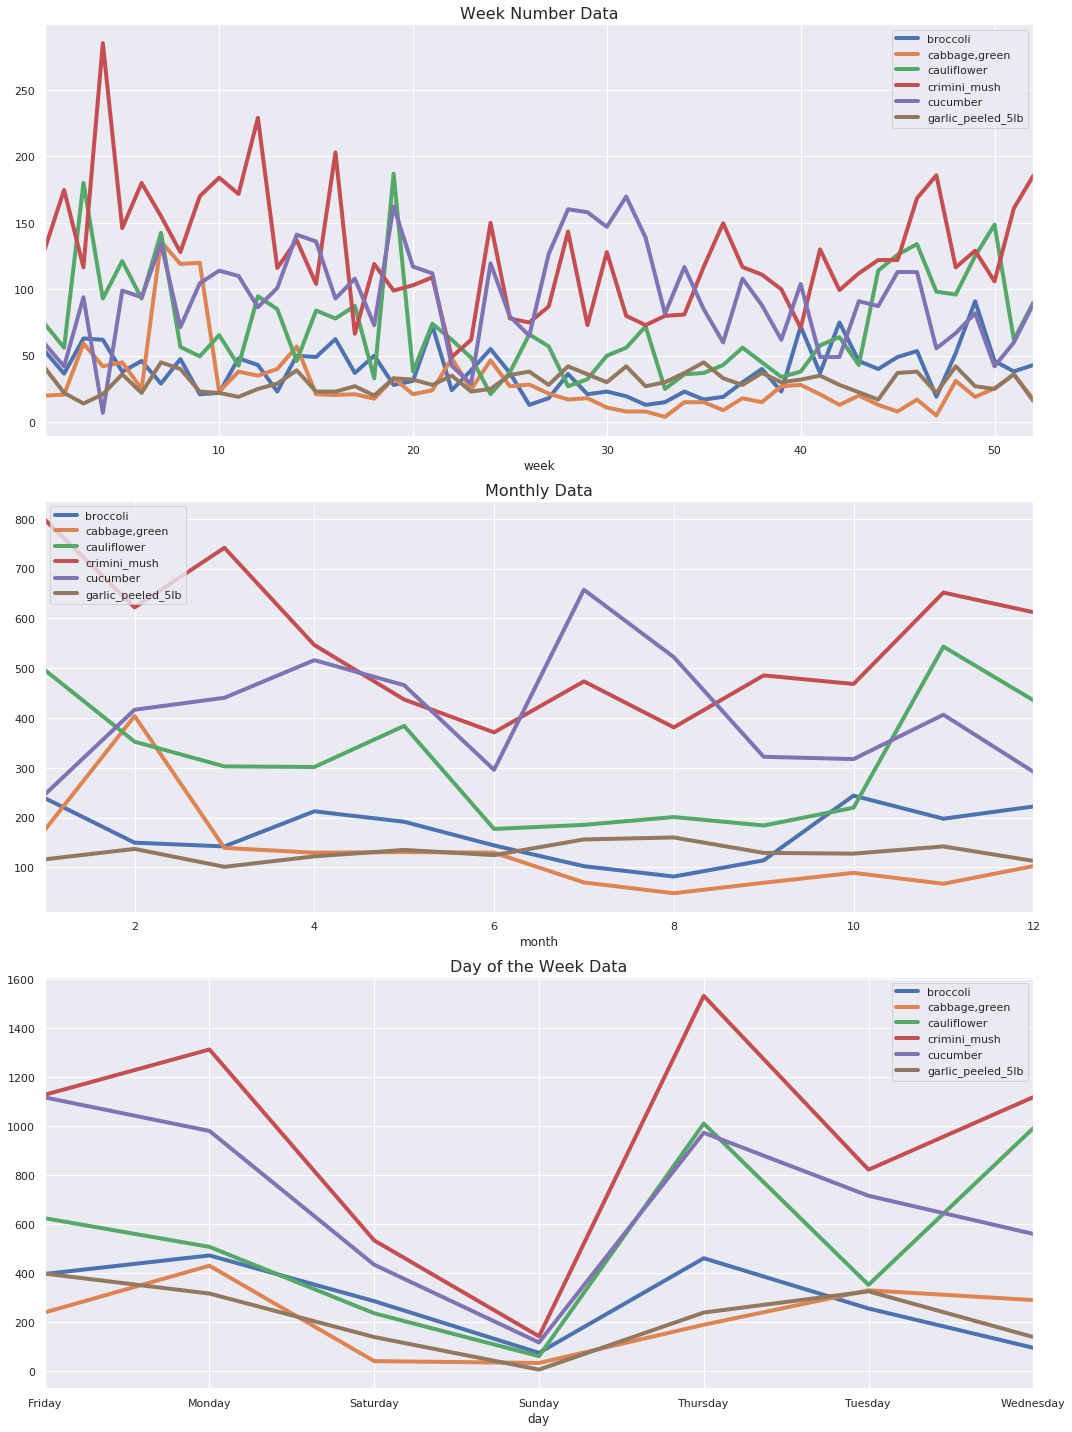

In [0]:
#re-index the dataset
cat= ['broccoli', 'cabbage,green', 'cauliflower', 'crimini_mush', 'cucumber',
       'garlic_peeled_5lb']
dfw = df.groupby('week').sum()
dfm = df.groupby('month').sum()
dfd = df.groupby('day').sum()


fig, axes = plt.subplots(nrows=3, ncols=1)

#plotting
dfw[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[0])
axes[0].title.set_text('Week Number Data')
axes[0].title.set_fontsize(16)
axes[0].legend(loc="upper right")

dfm[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[1])
axes[1].title.set_text('Monthly Data')
axes[1].title.set_fontsize(16)

dfd[cat].plot(figsize=(15,20), linewidth = 4, ax=axes[2])
axes[2].title.set_text('Day of the Week Data')
axes[2].title.set_fontsize(16)

plt.legend()
plt.tight_layout()

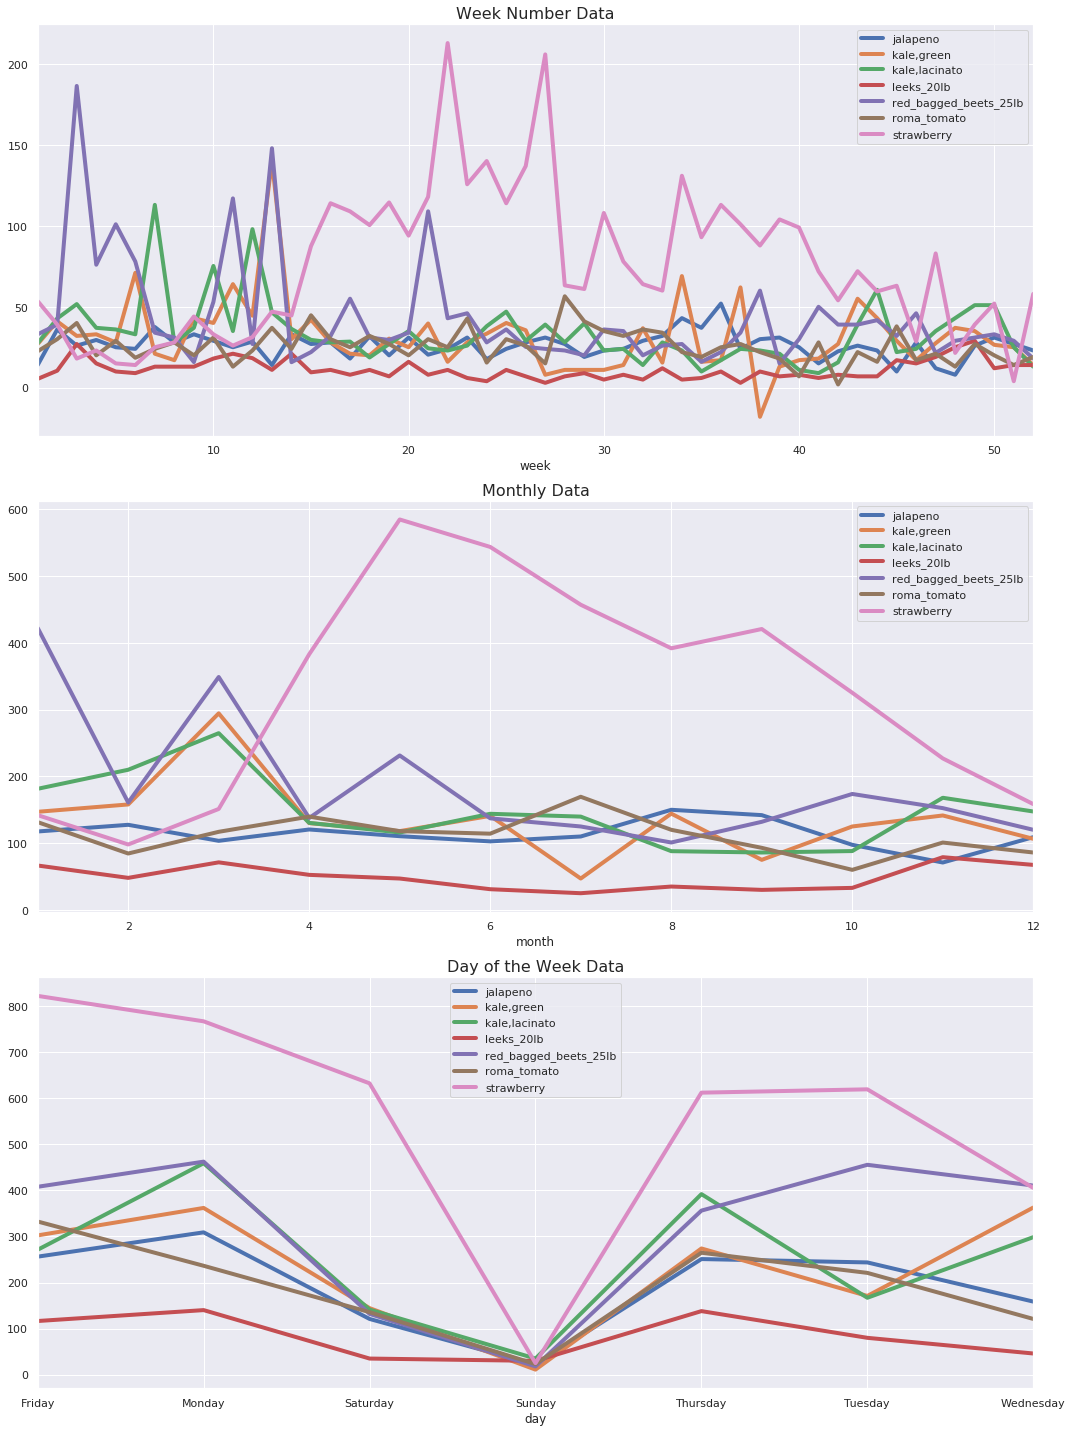

In [0]:
cat1=['jalapeno', 'kale,green', 'kale,lacinato',
       'leeks_20lb', 'red_bagged_beets_25lb', 'roma_tomato', 'strawberry']

dfw = df.groupby('week').sum()
dfm = df.groupby('month').sum()
dfd = df.groupby('day').sum()


fig, axes = plt.subplots(nrows=3, ncols=1)

#plotting
dfw[cat1].plot(figsize=(15,20), linewidth = 4, ax=axes[0])
axes[0].title.set_text('Week Number Data')
axes[0].title.set_fontsize(16)
axes[0].legend(loc="upper right")

dfm[cat1].plot(figsize=(15,20), linewidth = 4, ax=axes[1])
axes[1].title.set_text('Monthly Data')
axes[1].title.set_fontsize(16)

dfd[cat1].plot(figsize=(15,20), linewidth = 4, ax=axes[2])
axes[2].title.set_text('Day of the Week Data')
axes[2].title.set_fontsize(16)

plt.legend()
plt.tight_layout()

#### Insights


*   Highest order days are Mondays or Thursdays
* Strawberries are fun! With increases in the spring and slowly declining from there.
* Cabbage, mushrooms, and broccoli have a winter increase.


# Visualizing the outliers under each category:

How many outliers are there in each category? How many of those nasty outliers are there??? We will utilize box charts to visualize this.


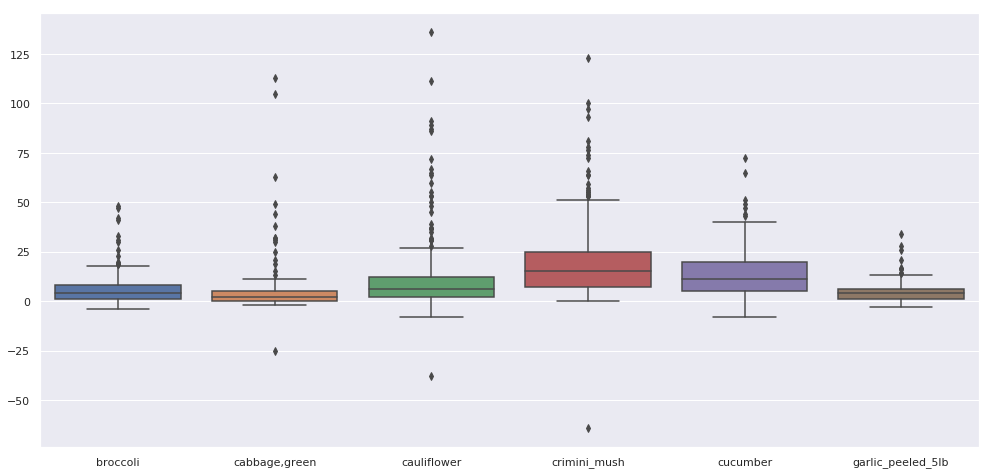

In [0]:
# Draw Plot
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(data=df[cat])

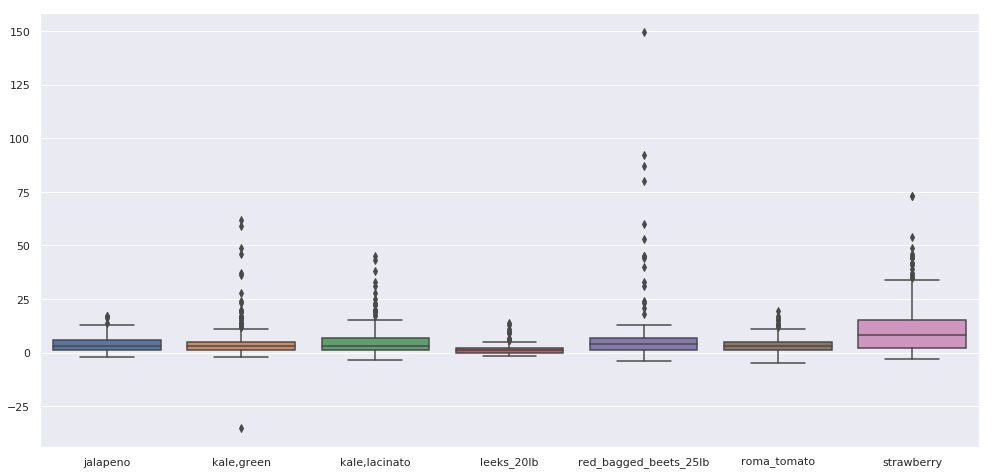

In [0]:
# Draw Plot
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(data=df[cat1])

#### Insights


*   Lots and lots of outliwers on the product level. I was kind of expecting this, but now I must figure out how to deal with them.




# Visualizing the individual items under the broader category
What do the distributions of each item look like under each category?


In [0]:
#importing the main dataframe
main_df = pd.read_csv('drive/My Drive/Capstone_2/data/one_year_categories.csv', index_col = 'invdate', parse_dates= True )#categories to test models
main_df['month'] = main_df.index.month 
main_df['week'] = main_df.index.week 
main_df['day'] = main_df.index.day_name()

How the individual items compare to the distribution of the entire category??



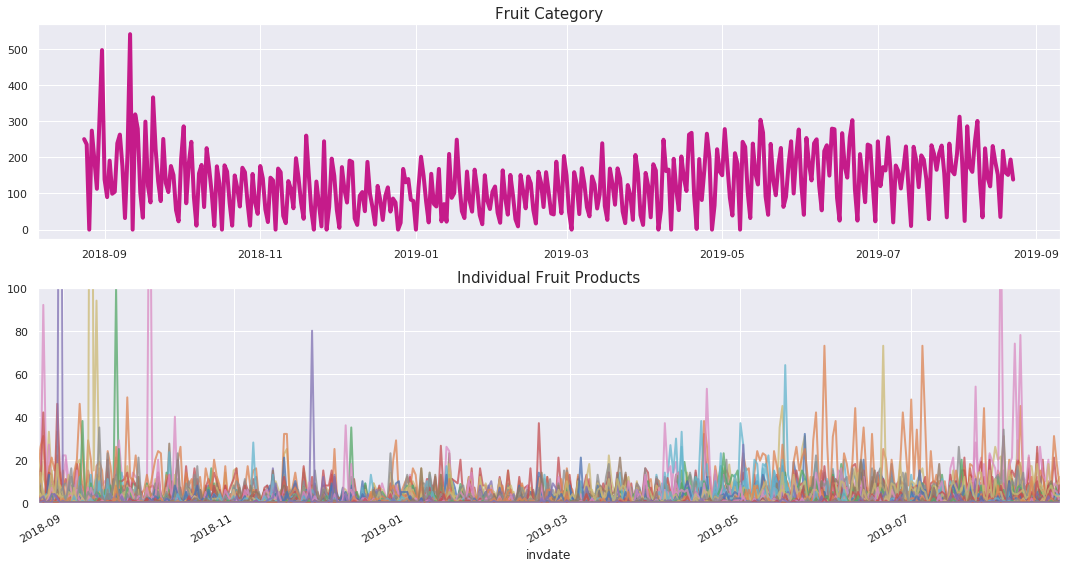

In [0]:
#Fruit Category

fdf= main_df[main_df.cat == 'fruit']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df2.index, df2['fruit'], linewidth= 4, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Overall Fruit Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Fruit Products", fontsize= 15)
axs[1].set_ylim (0, 100)

plt.tight_layout()

Text(0.5, 1.0, 'Fruit Category')

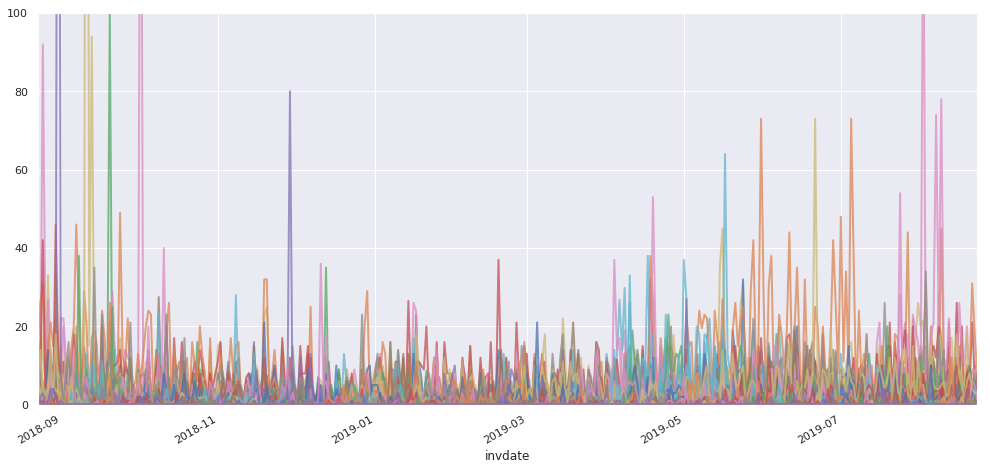

In [0]:
#upclose on the fruit category!

fdf.plot(figsize= (15,8), legend= False, linewidth= 2, alpha= .75)
plt.ylim (0, 100)
axs[0].plot(df2.index, df2['fruit'], linewidth= 4, label= 'fruit', color= '#c51b8a')
axs[0].set_title ("Fruit Category", fontsize= 15)

In [0]:
df2.columns

Index(['dairy_juice', 'fruit', 'grains', 'greens', 'meat', 'mushrooms',
       'potatoe', 'tomatoe', 'veg', 'year', 'month', 'day', 'week'],
      dtype='object')

How the individual items compare to the distribution of the entire category??



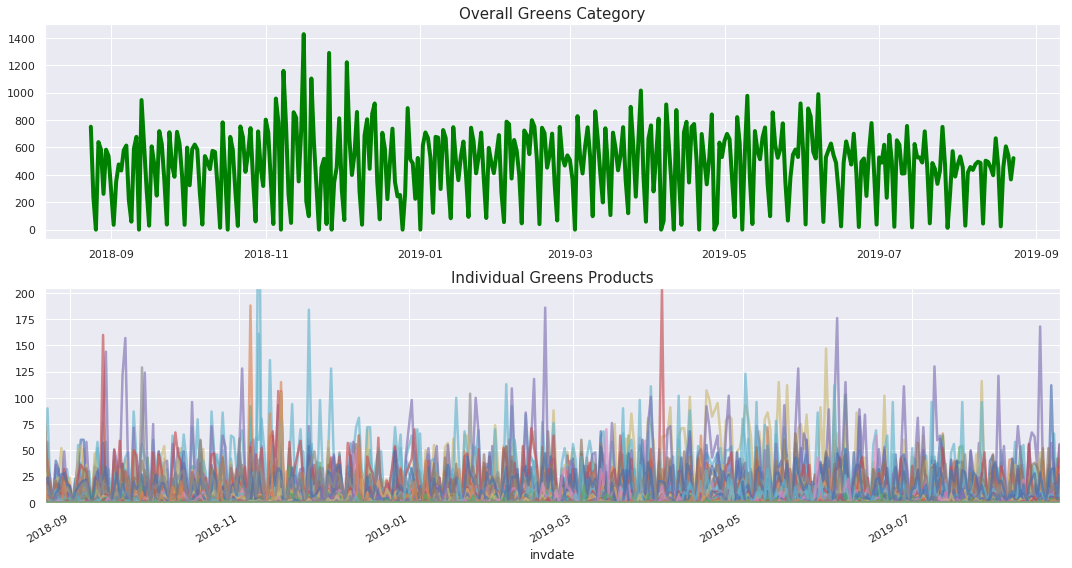

In [0]:
#Greens Category

fdf= main_df[main_df.cat == 'greens']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df2.index, df2['greens'], linewidth= 4, label= 'fruit', color= 'green')
axs[0].set_title ("Overall Greens Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Greens Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

How the individual items compare to the distribution of the entire category??



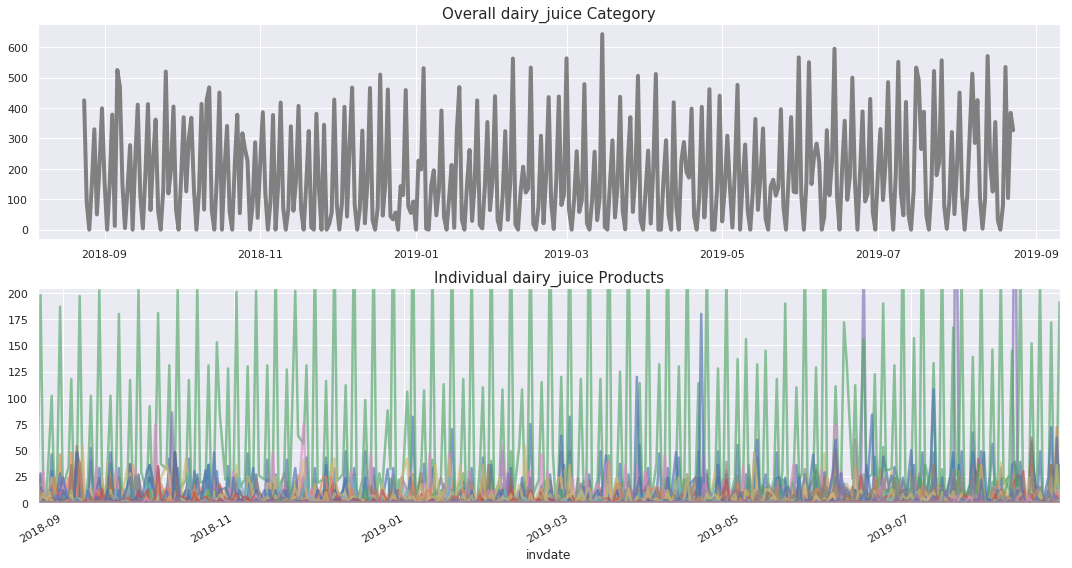

In [0]:
#Dairy/Juice Category

fdf= main_df[main_df.cat == 'dairy_juice']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df2.index, df2['dairy_juice'], linewidth= 4, label= 'fruit', color= 'grey')
axs[0].set_title ("Overall dairy_juice Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual dairy_juice Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

How the individual items compare to the distribution of the entire category??



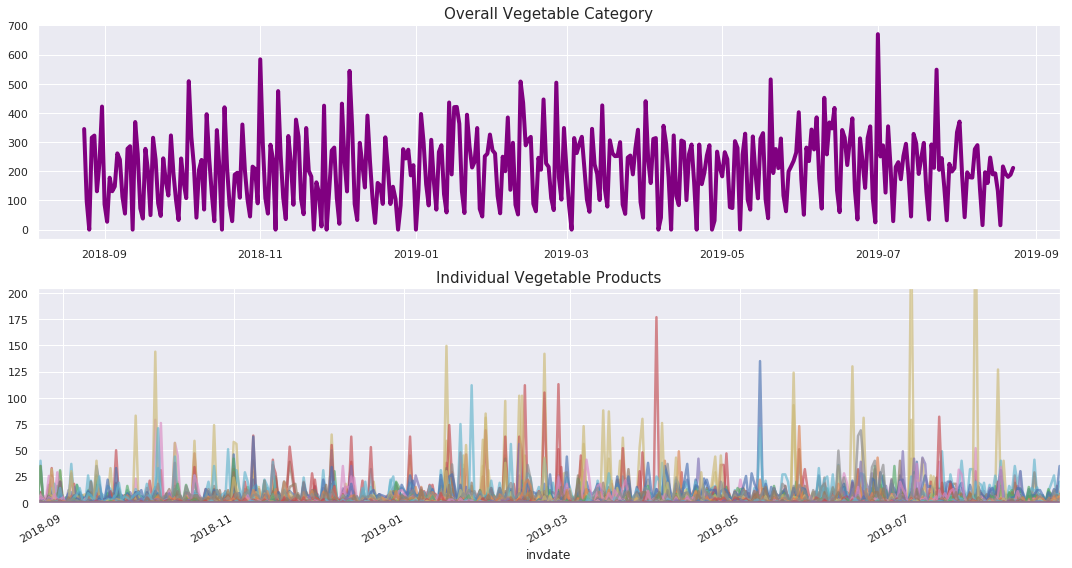

In [0]:
#Veg Category

fdf= main_df[main_df.cat == 'veg']
fdf = pd.pivot_table(fdf, values= "ordqty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

fig, axs = plt.subplots(2, figsize=(15,15))
axs[0].plot(df2.index, df2['veg'], linewidth= 4, label= 'veg', color= 'purple')
axs[0].set_title ("Overall Vegetable Category", fontsize= 15)

print("How the individual items compare to the distribution of the entire category??\n")
fdf.plot(figsize= (15,8), legend= False, linewidth= 2.5, alpha= .65, ax= axs[1])
axs[1].set_title ("Individual Vegetable Products", fontsize= 15)
axs[1].set_ylim (0, 205)

plt.tight_layout()

# Takeaways:


1.   On the individual level, the products have a LOT of outliers, and a lot of different seasonality and patterns happening.
2. All the worst performing items in the prophet model were the items with severe outliers and super low demand-- these are the ones where SES and SMA did better.
3. I will try coercing the outliers and adding monthly seasonality to help the prophet model.

